## 8일차 과제

* 주상병코드를 정해서 특정 질병에 대한 2018년 진료내역을 분석합니다.
* 월별, 요일별 진료수
* 연령대코드(5세단위), 성별코드별 진료 수와 심결요양급여비용총액 등에 대해 자율과제로 분석합니다.

* 주상병코드 참고 : http://www.koicd.kr/2016/kcd/v7.do?#4.2&n
* <img src="https://i.imgur.com/YuRvtz0.png">

In [1]:
# 내가 원하는 질병코드 하나를 정해서 데이터 분석 진행

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(font="AppleGothic",  
        rc={'axes.unicode_minus':False})
# 주피터 노트북에서 그래프 표시
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
set_matplotlib_formats('retina')

* 해당파일은 4주차 실습폴더의 data폴더에서 다운로드 받으실 수 있습니다.
* 2018년 진료내역 중 서울의 진료내역만 추출한 데이터 입니다.
* 과제 데이터 파일 다운로드 위치
https://drive.google.com/file/d/1zv4sLzG1AEc-tgSwYppAFnpgIWK61kyq/view?usp=sharing

In [4]:
df = pd.read_csv("data/nhis_patient_seoul_2018.csv")
df.shape

(2339135, 19)

In [5]:
df.head()

,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터기준일자
0,2018,19,36784300,1,1,11,20180914,3,13,J304,J40,1,1,0.15,21260,4400,16860,3,20191217
1,2018,19,48104127,1,1,11,20180714,3,13,J40,J4509,1,1,0.15,21260,4400,16860,3,20191217
2,2018,19,59541134,1,1,11,20180405,3,13,J00,J40,1,1,0.15,17470,3600,13870,4,20191217
3,2018,19,48872855,1,1,11,20180719,3,13,J40,J00,1,1,0.15,17700,3700,14000,2,20191217
4,2018,19,48876092,1,1,11,20180721,3,13,J40,J00,1,1,0.15,20860,4300,16560,3,20191217


In [6]:
df_E = df[df["주상병코드"].str.startswith("E1")].copy()
df_E.shape

(67097, 19)

In [7]:
# 중간데이터에 결측치가 있다면 float을 슬라이싱 할 수 없기 때문에 오류가 납니다.
# 예외처리가 필요합니다.

# nan = np.nan
# nan[:3]

In [8]:
estr = 'E119'
estr[:3]

'E11'

In [9]:
# 함수 재사용을 위해 함수로 만듭니다.

def find_code(estr):
#     앞에서 3개의 문자가 질병분류명을 의하기 때문에 3개의 문자만 가져오고 'E'라는 문자는 제거합니다.
    estr = estr[:3].replace('E','')
    return estr

find_code('E119')

'11'

In [10]:
# 데이터프레임의 서브셋을 만들때 위에서 .copy()로 사본을 생성해 주어야 아래 작업을 할 때 warning 메시지가 뜨지 않습니다.
df_E['E_NO'] = df_E['주상병코드'].map(find_code)
df_E[['주상병코드','E_NO']].head()

,주상병코드,E_NO
334,E119,11
336,E119,11
337,E119,11
338,E119,11
339,E119,11


In [11]:
# E_NO 로 전처리해 준 컬럼의 unique 을 봤습니다.
df_E['E_NO'].unique()

array(['11', '10', '14', '13', '12', '16'], dtype=object)

In [12]:
# 숫자라도 문자열로 되어있다면 문자열로 가져와야합니다.
# df_E[df_E['E_NO'].isin([10,11,12,13,14])]

df_E = df_E[df_E['E_NO'].isin(['10','11','12','13','14'])].copy()
df_E.shape

(67011, 20)

In [13]:
df_E['E_NO'].value_counts()

11    57488
14     8226
13      720
10      536
12       41
Name: E_NO, dtype: int64

In [14]:
# csv 파일 추출
# df_E.to_csv('data/patient_e_code_seoul_2918.csv', index=False)

In [15]:
# pd.read_csv('data/patient_e_code_seoul_2918.csv')

In [16]:
df_E.head()

,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터기준일자,E_NO
334,2018,151,38808276,1,11,11,20180920,3,1,E119,I109,1,1,0.15,93000,27900,65100,90,20191217,11
336,2018,151,55844540,1,11,11,20180419,3,1,E119,I109,1,1,0.15,14040,4200,9840,60,20191217,11
337,2018,151,18505537,1,11,11,20181221,3,1,E119,I109,1,1,0.15,14040,4200,9840,90,20191217,11
338,2018,151,47991170,1,11,11,20180621,3,1,E119,I109,1,1,0.15,14040,4200,9840,90,20191217,11
339,2018,151,6045995,1,11,11,20180214,3,1,E119,I109,1,1,0.15,14020,4200,9820,60,20191217,11


## 진료내역 분석
 - G40-G47 우발적 및 발자적 장애

### 우발적 및 발자적 장애 코드 및 데이터프레임 세팅

In [17]:
# df_G에 G4로 시작하는 주상병코드 세팅
df_G = df[df["주상병코드"].str.startswith("G4")].copy()
print("주상병코드 G4 :", df_G.shape)

주상병코드 G4 : (12298, 19)


In [18]:
df_G["주상병코드"].str[:3].str.replace("G", "").replace("_", "").unique()

array(['47', '43', '44', '45', '46'], dtype=object)

In [19]:
# 함수 재사용을 위해 함수로 만듭니다.

def find_code_G(gstr):
#     앞에서 3개의 문자가 질병분류명을 의하기 때문에 3개의 문자만 가져오고 'G'라는 문자는 제거합니다.
    gstr = gstr[:3].replace('G','')
    return gstr


In [20]:
df_G['G_NO'] = df_G['주상병코드'].map(find_code_G)
df_G[['주상병코드','G_NO']].head()

,주상병코드,G_NO
11,G4730,47
16,G4730,47
25,G4730,47
112,G438,43
449,G438,43


In [21]:
df_G = df_G[df_G['G_NO'].isin(['47','43','44','45','46'])].copy()
df_G.shape

(12298, 20)

In [22]:
# G4 코드별 분류
df_G['G_NO'].value_counts()

47    4332
43    3602
44    3205
45     964
46     195
Name: G_NO, dtype: int64

In [23]:
# 결과
df_G.head()

,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터기준일자,G_NO
11,2018,20,35719169,2,10,11,20180920,2,2,G4730,R630,2,8,0.20,717580,143510,574070,0,20191217,47
16,2018,20,52136968,2,10,11,20180511,3,13,G4730,G470,1,1,0.30,48410,36500,11910,1,20191217,47
25,2018,20,31792938,2,10,11,20181002,3,2,G4730,R58,1,1,0.20,13210,5200,8010,3,20191217,47
112,2018,98,46851187,2,8,11,20180726,3,2,G438,G442,1,1,0.15,42080,12600,29480,2,20191217,43
449,2018,223,51902682,1,6,11,20180530,3,2,G438,R111,1,1,0.15,42090,12600,29490,14,20191217,43


### 주상병명 매핑 작업

In [24]:
# 주상병코드별 명칭
codes = {
'47' : "수면장애",
'43' : "편두통",
'44' : "기타 두통증후군",
'45' : "일과성 뇌허혈발작 및 관련 증후군",
'46' : "뇌혈관질환에서의 뇌의 혈관 증후군",
}
codes

{'47': '수면장애',
 '43': '편두통',
 '44': '기타 두통증후군',
 '45': '일과성 뇌허혈발작 및 관련 증후군',
 '46': '뇌혈관질환에서의 뇌의 혈관 증후군'}

In [25]:
# 주상병명 매핑
df_G['주상병명'] = df_G['G_NO'].map(codes)
df_G[['G_NO','주상병명']].sample(10)

,G_NO,주상병명
2230415,47,수면장애
93295,47,수면장애
297154,47,수면장애
1230509,47,수면장애
1263067,46,뇌혈관질환에서의 뇌의 혈관 증후군
39978,43,편두통
916950,46,뇌혈관질환에서의 뇌의 혈관 증후군
2052175,47,수면장애
1793238,44,기타 두통증후군
1872106,44,기타 두통증후군


## 우발적 및 발자적 장애 코드 및 주상병명을 이용한 분석

In [26]:
df_G.head()

,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,...,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터기준일자,G_NO,주상병명
11,2018,20,35719169,2,10,11,20180920,2,2,G4730,...,2,8,0.20,717580,143510,574070,0,20191217,47,수면장애
16,2018,20,52136968,2,10,11,20180511,3,13,G4730,...,1,1,0.30,48410,36500,11910,1,20191217,47,수면장애
25,2018,20,31792938,2,10,11,20181002,3,2,G4730,...,1,1,0.20,13210,5200,8010,3,20191217,47,수면장애
112,2018,98,46851187,2,8,11,20180726,3,2,G438,...,1,1,0.15,42080,12600,29480,2,20191217,43,편두통
449,2018,223,51902682,1,6,11,20180530,3,2,G438,...,1,1,0.15,42090,12600,29490,14,20191217,43,편두통


### 주상병명 월별, 요일별 진료수 분석

In [47]:
# 숫자 형태의 데이터는 날짜를 timestamp로 봅니다.
# 따라서 날짜형태로 타입변경을 위해 str 타입으로 변경합니다.
df_G["요양개시일자"] = df["요양개시일자"].astype(str)
df_G["요양개시일자"] = pd.to_datetime(df_G["요양개시일자"])
df_G.head()

,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,...,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터기준일자,G_NO,주상병명
11,2018,20,35719169,2,10,11,2018-09-20,2,2,G4730,...,2,8,0.20,717580,143510,574070,0,20191217,47,수면장애
16,2018,20,52136968,2,10,11,2018-05-11,3,13,G4730,...,1,1,0.30,48410,36500,11910,1,20191217,47,수면장애
25,2018,20,31792938,2,10,11,2018-10-02,3,2,G4730,...,1,1,0.20,13210,5200,8010,3,20191217,47,수면장애
112,2018,98,46851187,2,8,11,2018-07-26,3,2,G438,...,1,1,0.15,42080,12600,29480,2,20191217,43,편두통
449,2018,223,51902682,1,6,11,2018-05-30,3,2,G438,...,1,1,0.15,42090,12600,29490,14,20191217,43,편두통


In [49]:
# 연도, 월, 요일 데이터 컬럼 생성
df_G["연도"] = df_G["요양개시일자"].dt.year
df_G["월"] = df_G["요양개시일자"].dt.month
df_G["요일"] = df_G["요양개시일자"].dt.dayofweek


In [50]:
# 요일을 한글로 변경하는데 사용합니다.
weekday = {0:"월", 1:"화", 2:"수", 3:"목", 4:"금", 5:"토", 6:"일"}
weekday

{0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}

In [52]:
df_G["요일명"] = df_G["요일"].map(weekday)

df_G.head()

,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,...,심결본인부담금,심결보험자부담금,총처방일수,데이터기준일자,G_NO,주상병명,연도,월,요일,요일명
11,2018,20,35719169,2,10,11,2018-09-20,2,2,G4730,...,143510,574070,0,20191217,47,수면장애,2018,9,3,목
16,2018,20,52136968,2,10,11,2018-05-11,3,13,G4730,...,36500,11910,1,20191217,47,수면장애,2018,5,4,금
25,2018,20,31792938,2,10,11,2018-10-02,3,2,G4730,...,5200,8010,3,20191217,47,수면장애,2018,10,1,화
112,2018,98,46851187,2,8,11,2018-07-26,3,2,G438,...,12600,29480,2,20191217,43,편두통,2018,7,3,목
449,2018,223,51902682,1,6,11,2018-05-30,3,2,G438,...,12600,29490,14,20191217,43,편두통,2018,5,2,수


### 월별 진료수 분석

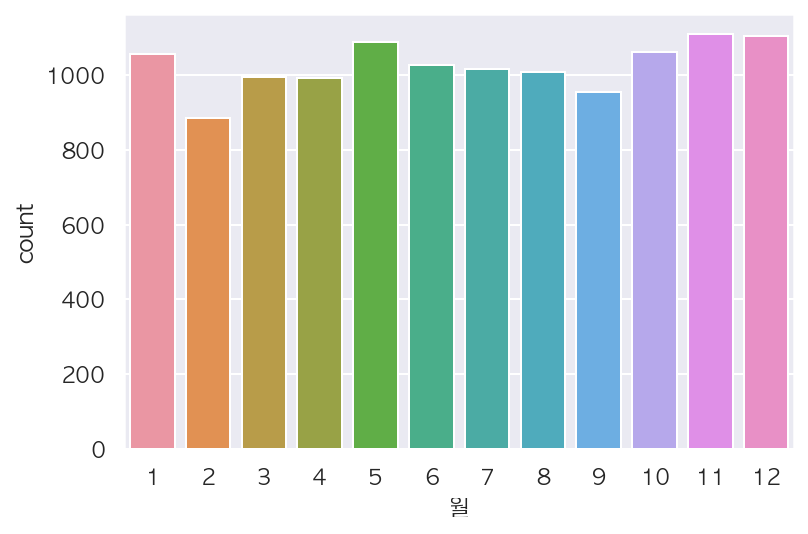

In [69]:
# countplot 으로 월별 그래프를 그립니다.
sns.countplot(data=df_G, x="월")

In [67]:
day_count = df_G["요양개시일자"].value_counts().reset_index()
day_count.columns = ["요양개시일자", "내역수"]
day_count = day_count.sort_values(by="요양개시일자")
day_count.head()

,요양개시일자,내역수
356,2018-01-01,1
13,2018-01-02,61
100,2018-01-03,45
216,2018-01-04,35
193,2018-01-05,38


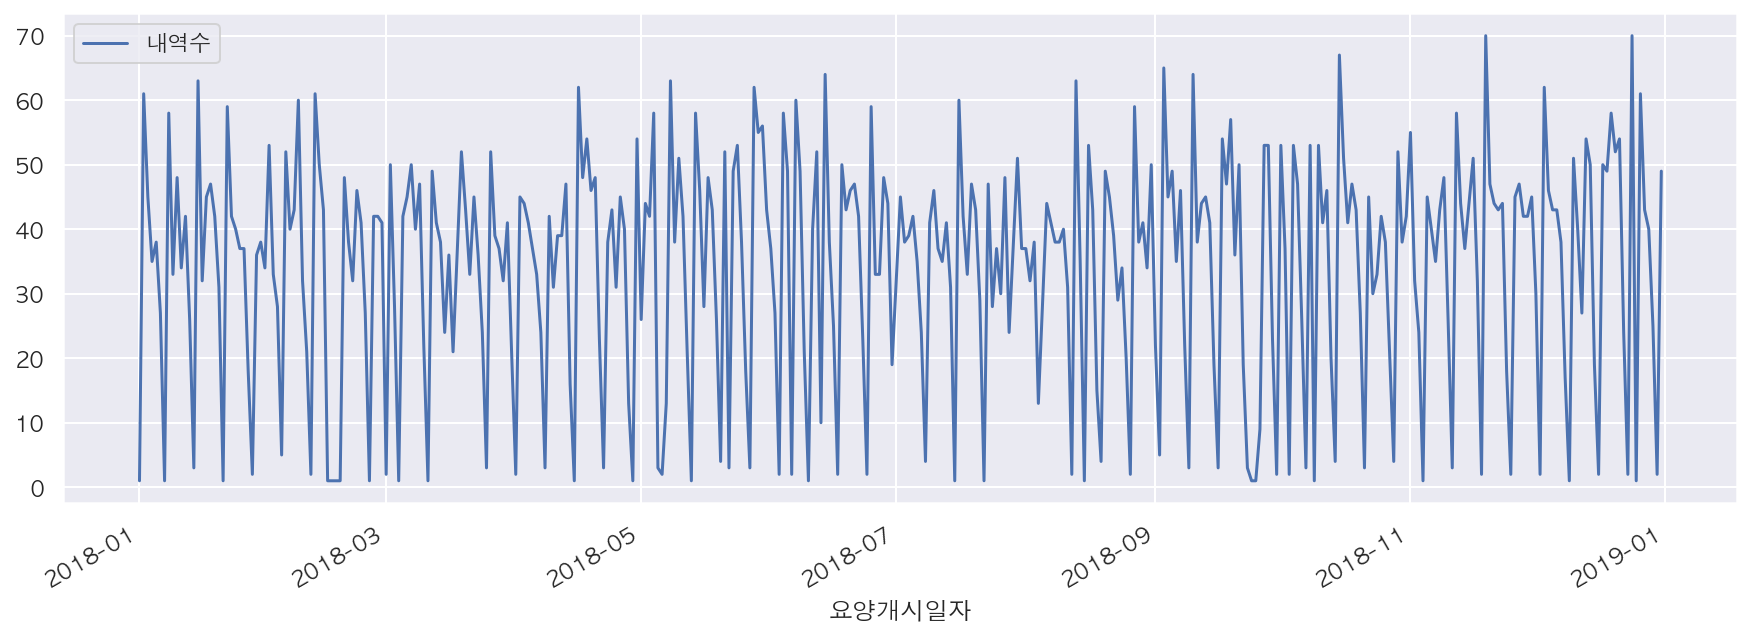

In [68]:
day_count.plot(x="요양개시일자", y="내역수", figsize=(15, 5))

In [73]:
df_day = df_G.groupby(
    ["연도", "월", "요양개시일자", "G_NO"], as_index=False)["진료내역일련번호"].count()
df_day.columns = ["기준년도", "월", "요양개시일자", "G_NO", "진료수"]
df_day.head()

,기준년도,월,요양개시일자,G_NO,진료수
0,2018,1,2018-01-01,43,1
1,2018,1,2018-01-02,43,13
2,2018,1,2018-01-02,44,13
3,2018,1,2018-01-02,45,4
4,2018,1,2018-01-02,46,1


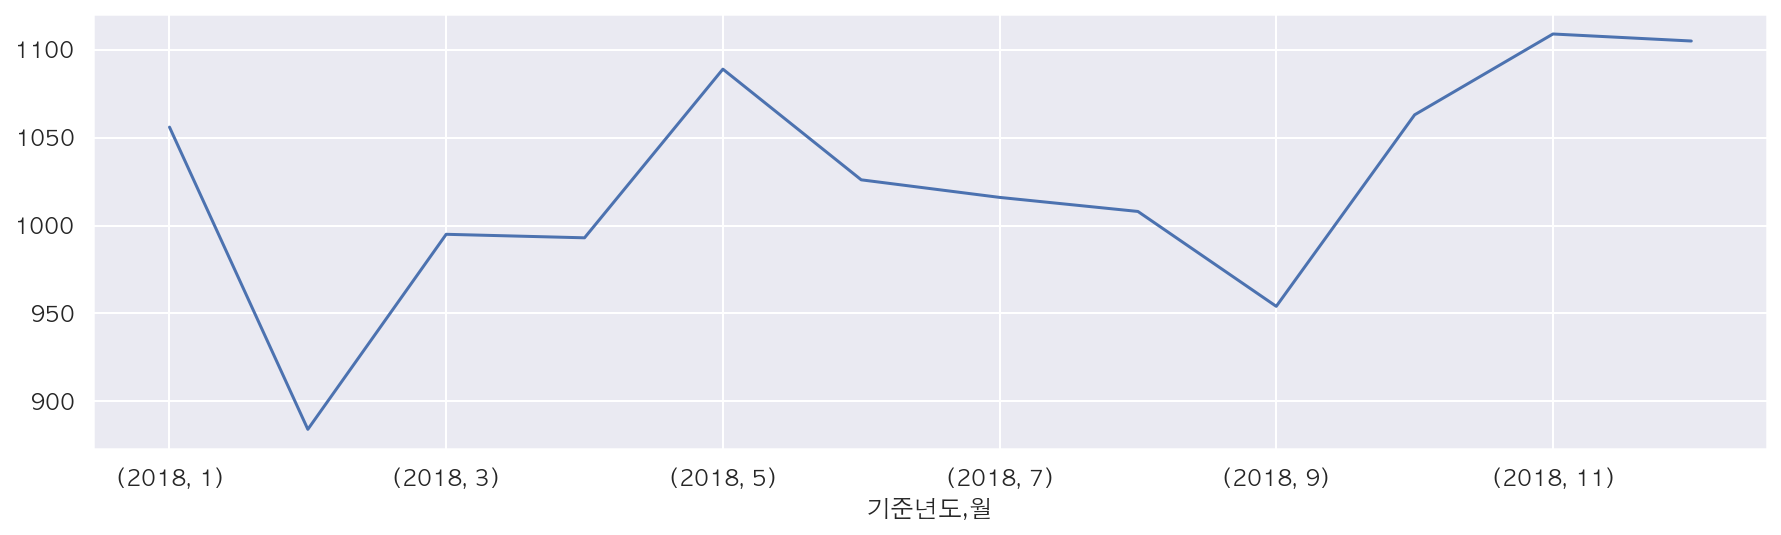

In [74]:
# 월별 진료수 합계
df_day.groupby(["기준년도", "월"])["진료수"].sum().plot(figsize=(15, 4))

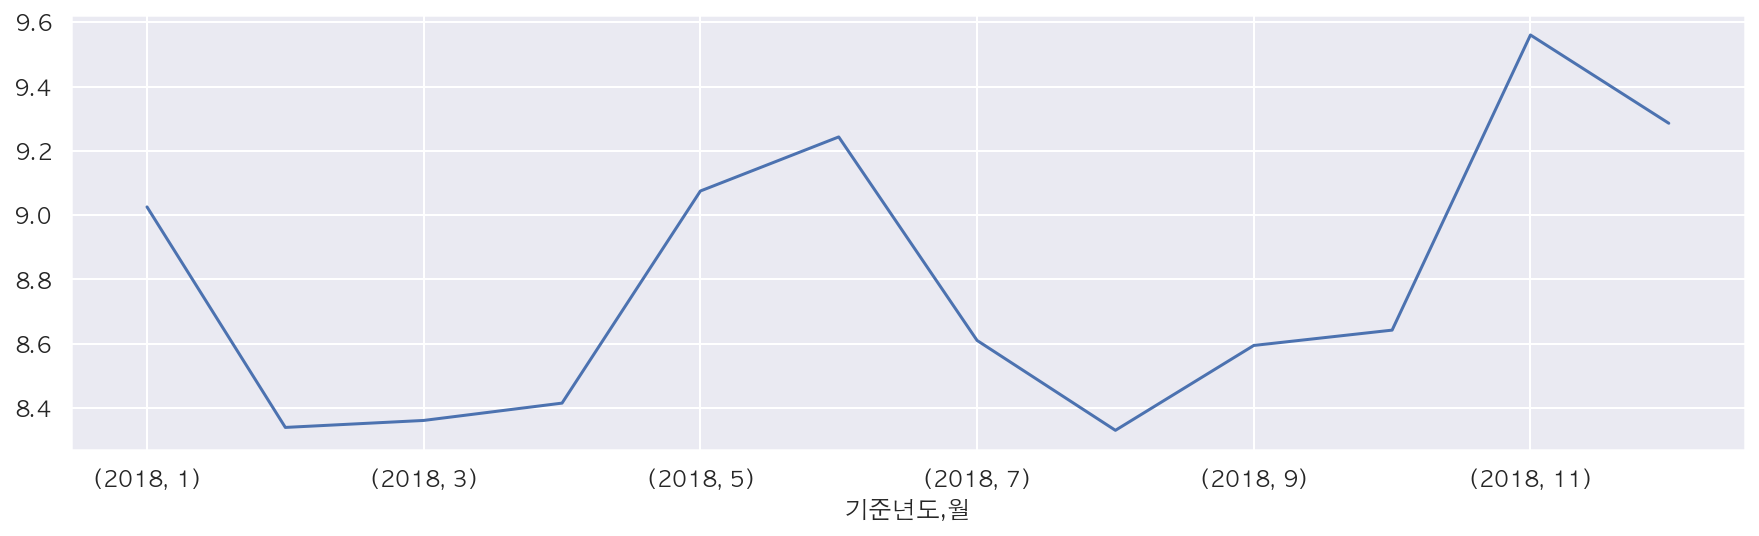

In [75]:
# 월별 진료수 평균
df_day.groupby(["기준년도", "월"])["진료수"].mean().plot(figsize=(15, 4))

### 요일별 진료수 분석

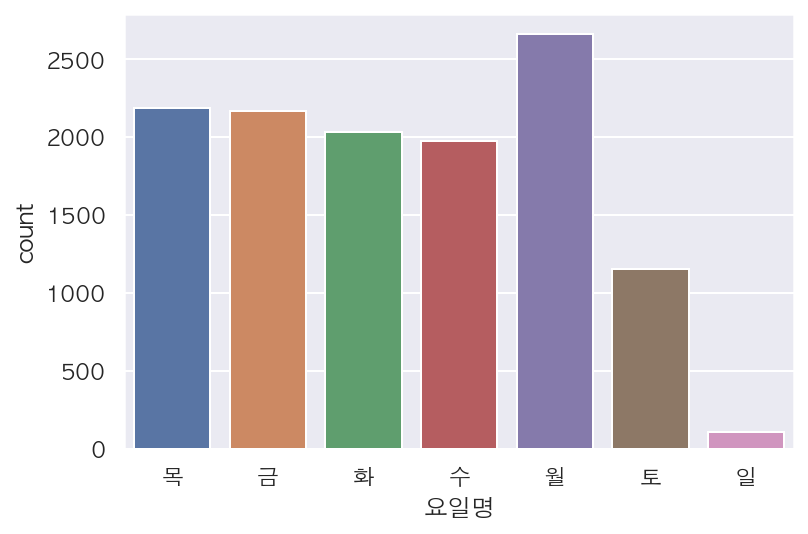

In [77]:
# countplot 으로 요일별 그래프를 그립니다.
sns.countplot(data=df_G, x="요일명")

In [78]:
df_dayow = df_G.groupby(
    ["연도", "요일명", "요양개시일자", "G_NO"], as_index=False)["진료내역일련번호"].count()
df_dayow.columns = ["기준년도", "요일명", "요양개시일자", "G_NO", "진료수"]
df_dayow.head()

,기준년도,요일명,요양개시일자,G_NO,진료수
0,2018,금,2018-01-05,43,8
1,2018,금,2018-01-05,44,14
2,2018,금,2018-01-05,45,6
3,2018,금,2018-01-05,46,2
4,2018,금,2018-01-05,47,8


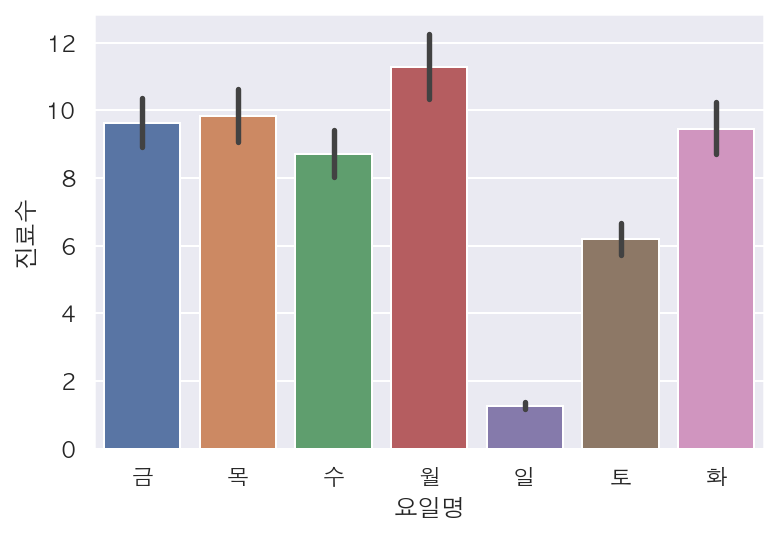

In [94]:
# 요일별 진료수
sns.barplot(data=df_dayow, x='요일명', y="진료수")

### 성별을 이용한 분석

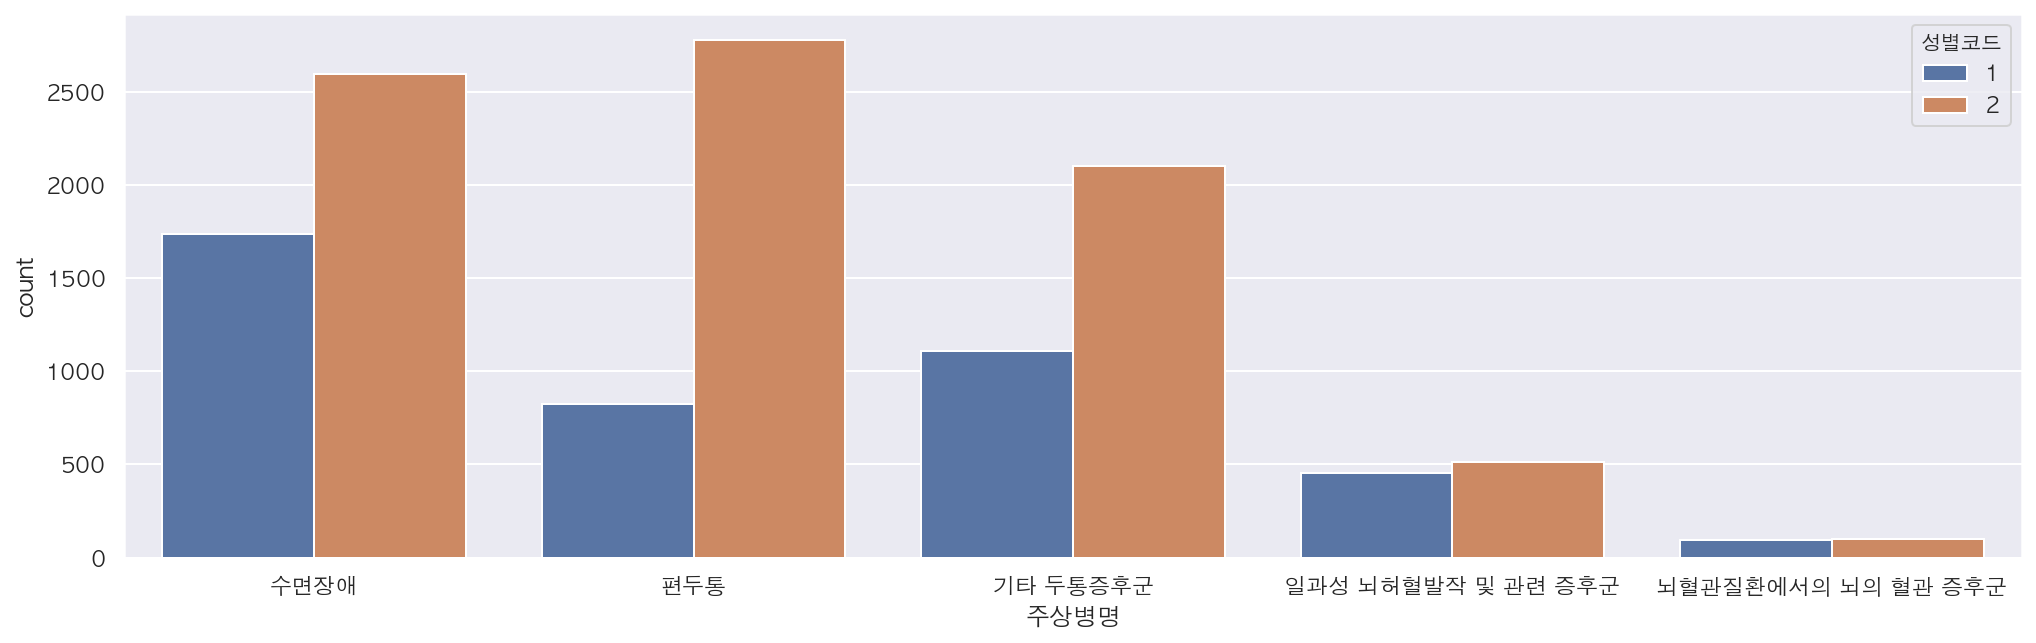

In [27]:
# 성별에 따른 주상병명 분석
plt.figure(figsize=(17,5))
sns.countplot(data=df_G, x='주상병명', hue='성별코드')

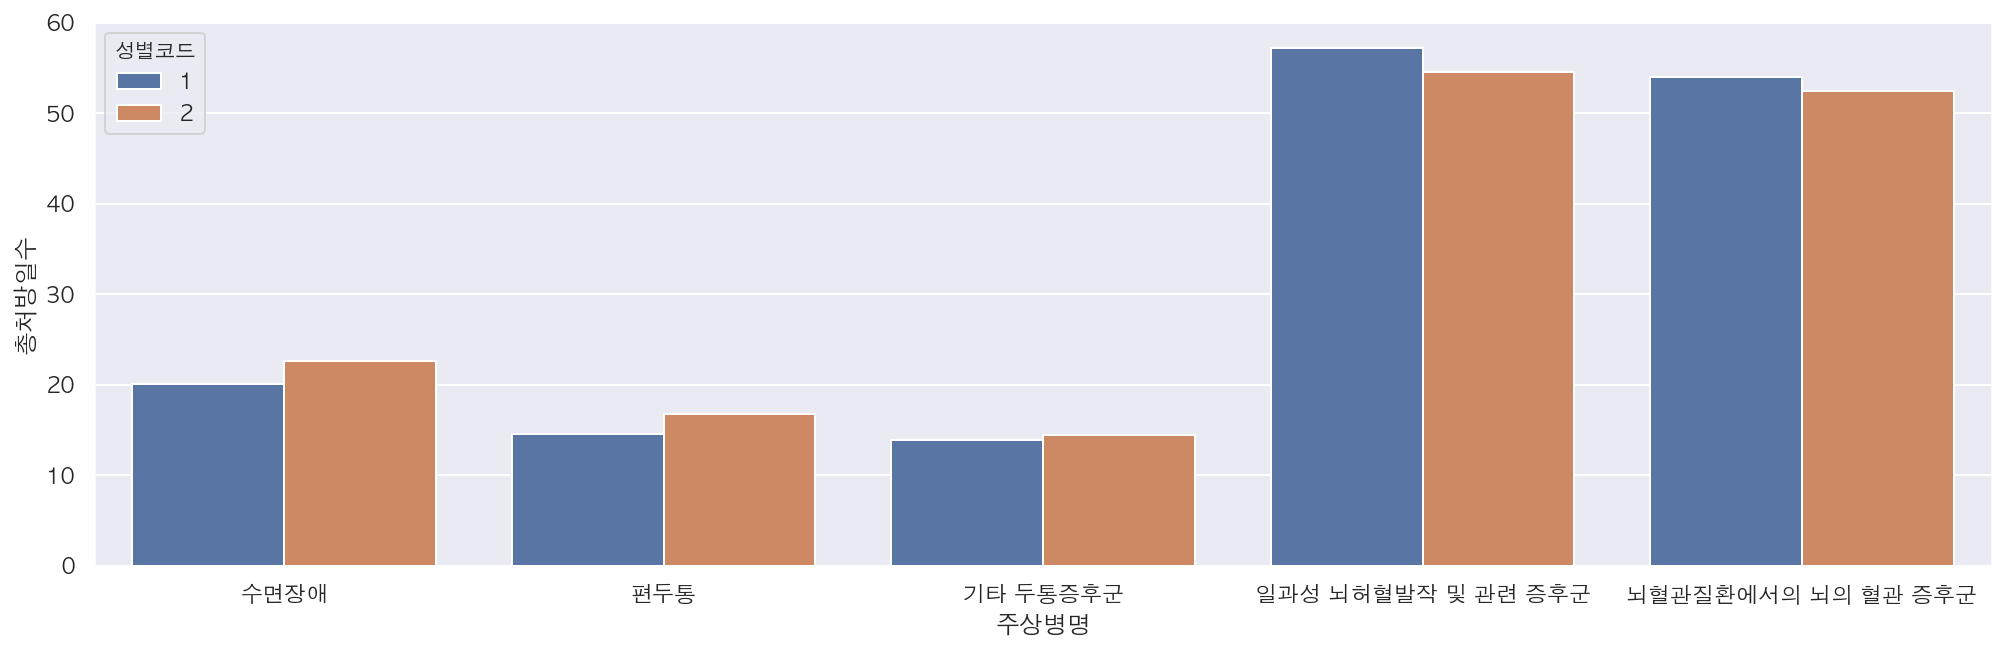

In [28]:
# 주상병명에 따라 총처방일수 성별 분석

plt.figure(figsize=(17,5))
sns.barplot(data=df_G, x='주상병명', y='총처방일수', hue='성별코드', ci=None)

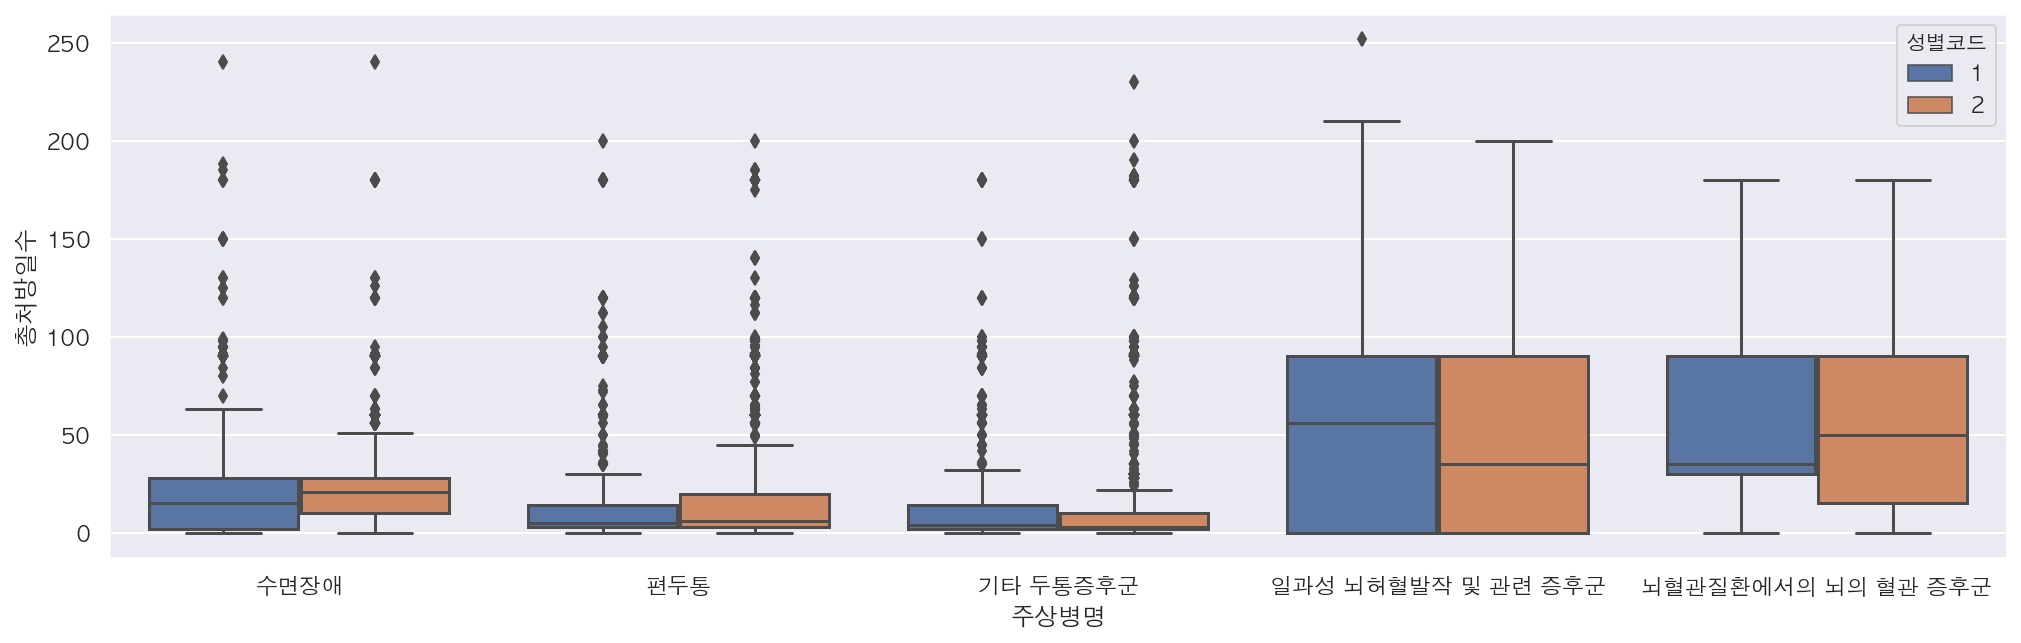

In [29]:
plt.figure(figsize=(17,5))
sns.boxplot(data=df_G[df_G['총처방일수'] < 300], x='주상병명', y='총처방일수', hue='성별코드')

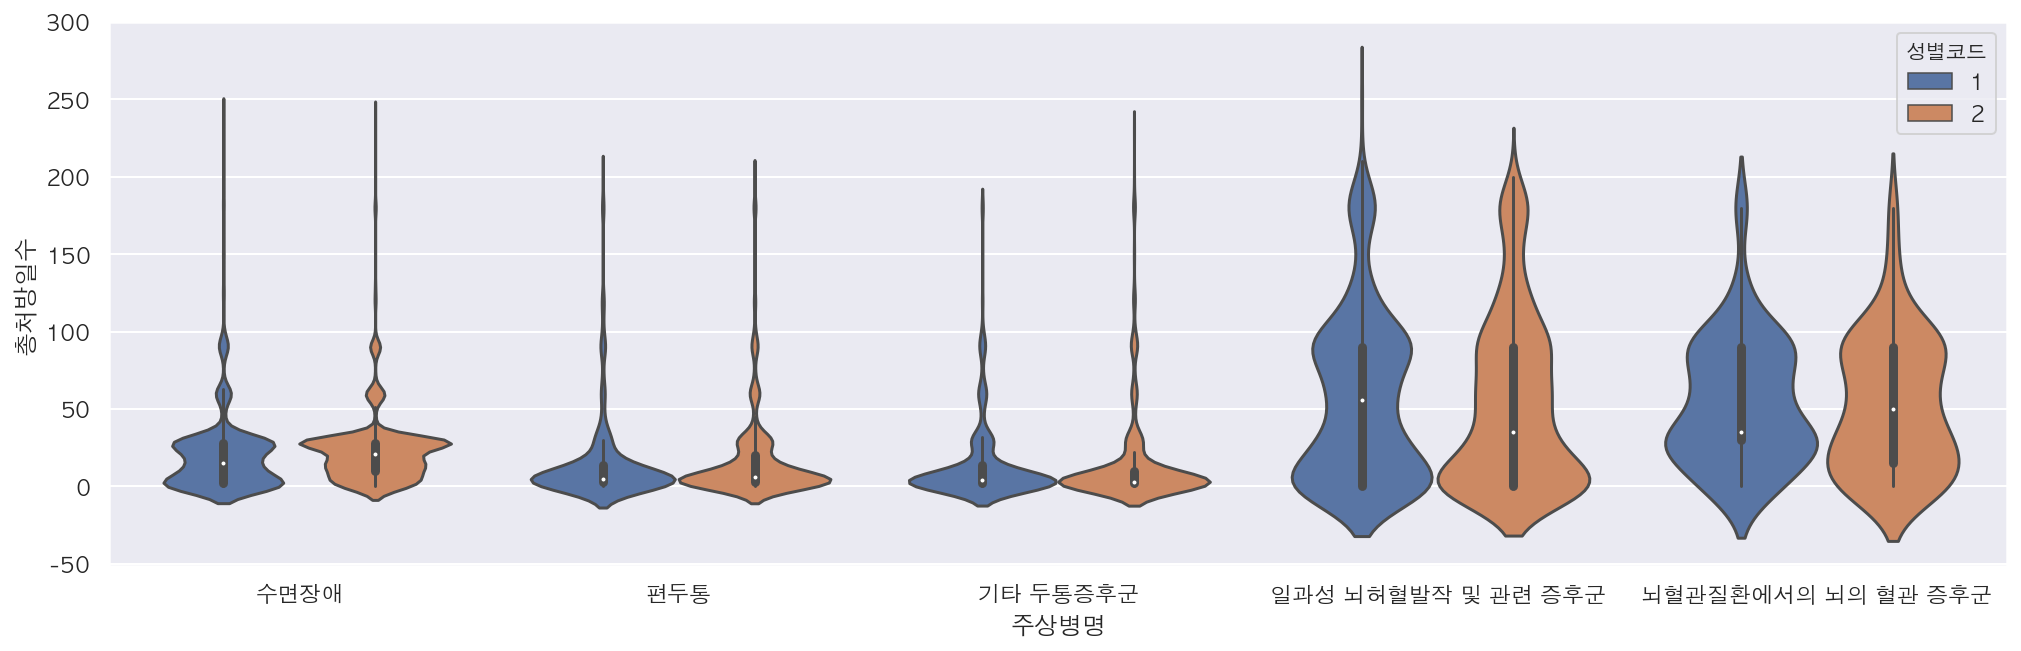

In [30]:
plt.figure(figsize=(17,5))
sns.violinplot(data=df_G[df_G['총처방일수'] < 300], x='주상병명', y='총처방일수', hue='성별코드')

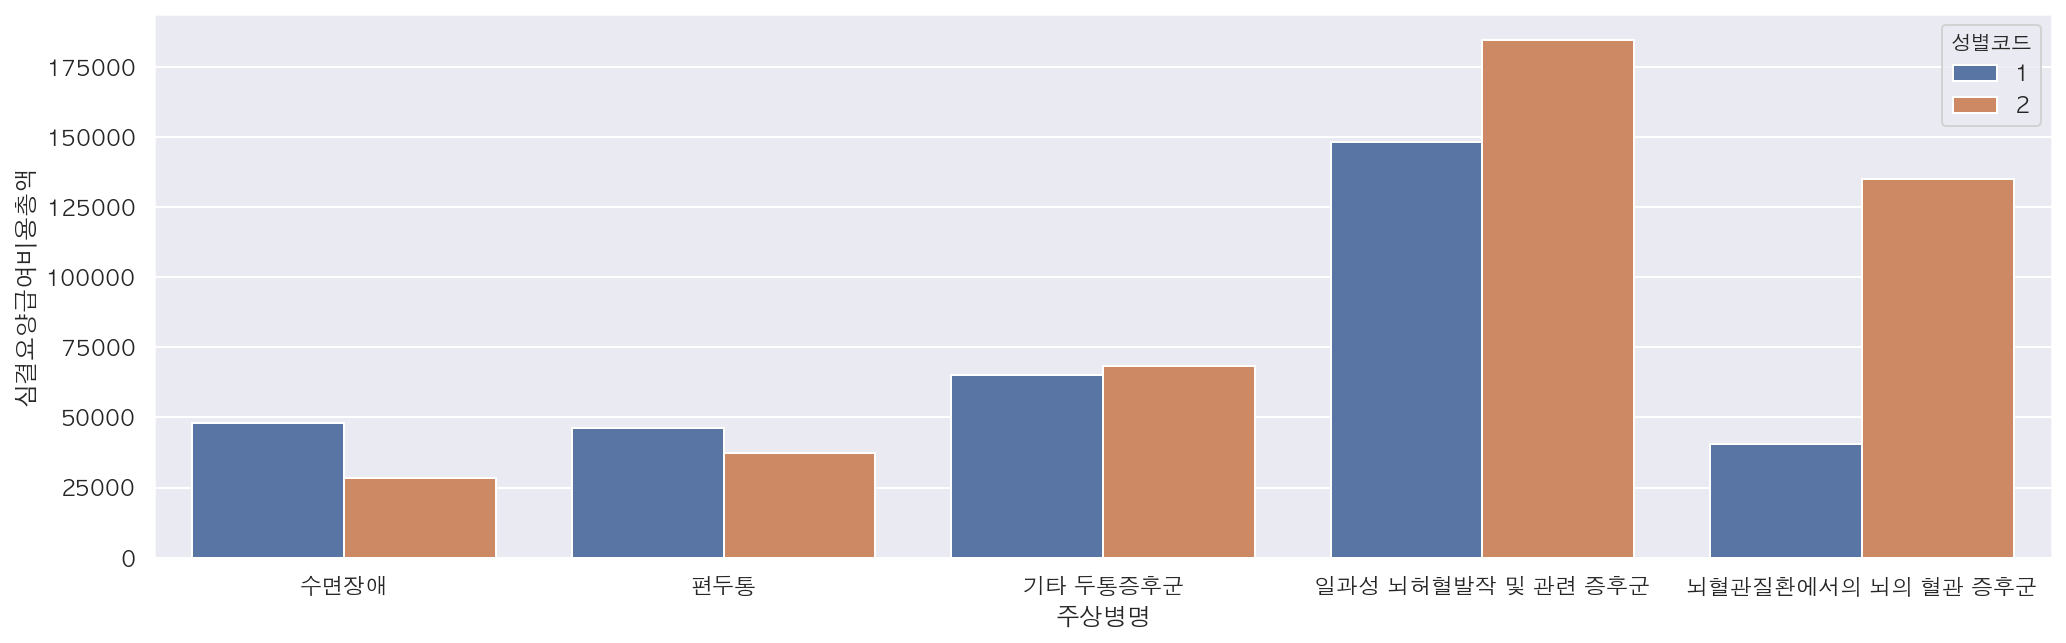

In [43]:
plt.figure(figsize=(17,5))
sns.barplot(data=df_G, x='주상병명', y='심결요양급여비용총액', hue='성별코드', ci=None)

### 연령대 코드를 이용한 분석

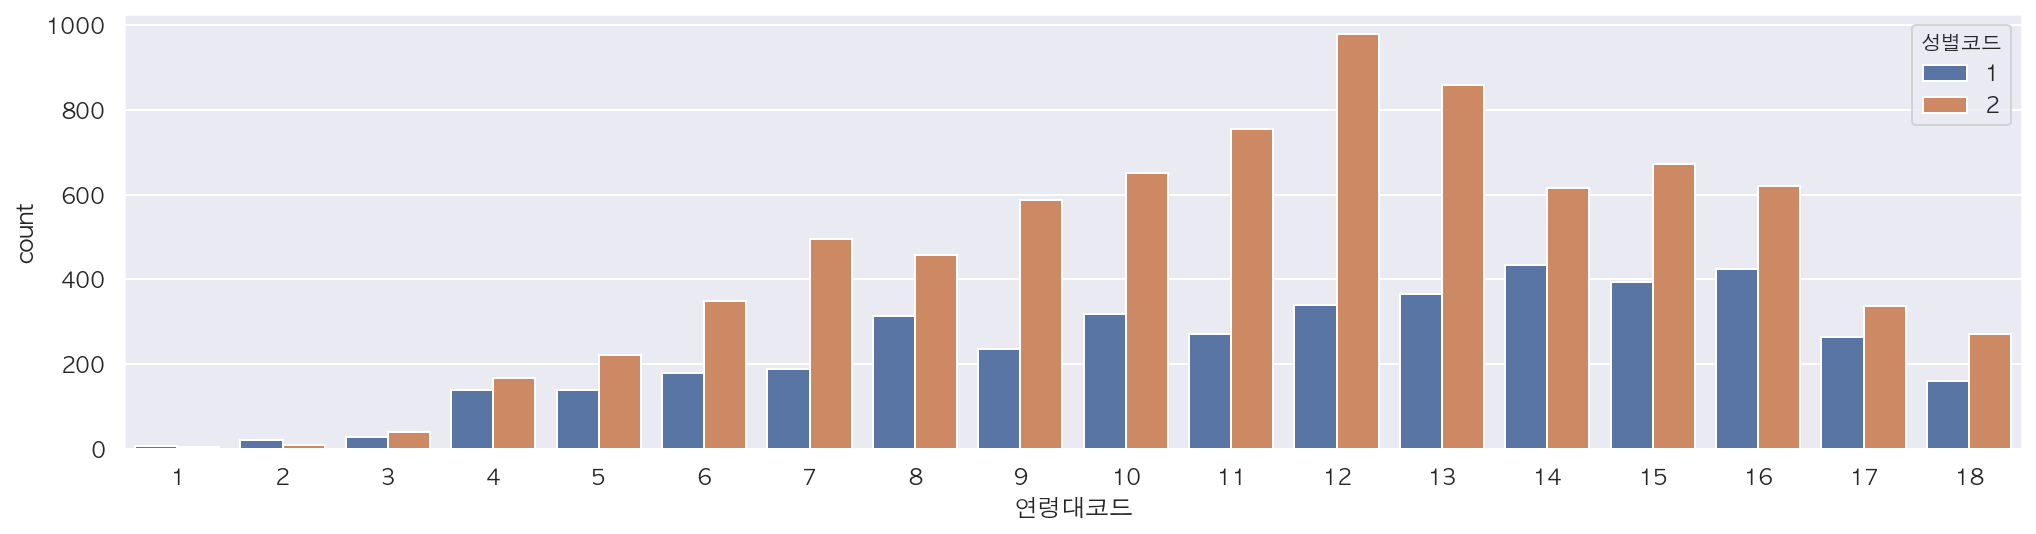

In [32]:
# 연령대별 성별
plt.figure(figsize=(17, 4))
sns.countplot(data=df_G, x="연령대코드", hue="성별코드")

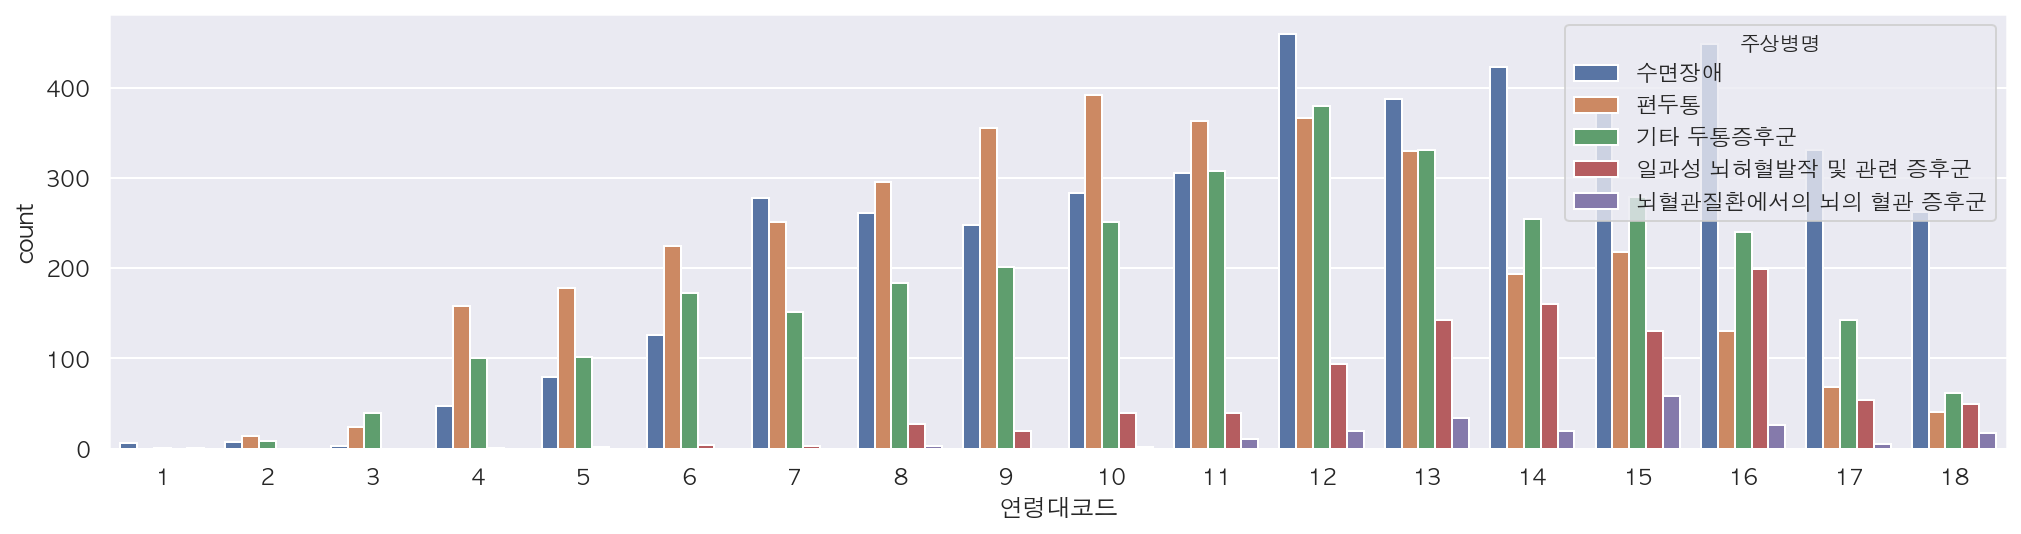

In [33]:
# 연령대별 주상병명
plt.figure(figsize=(17, 4))
sns.countplot(data=df_G, x="연령대코드", hue="주상병명")

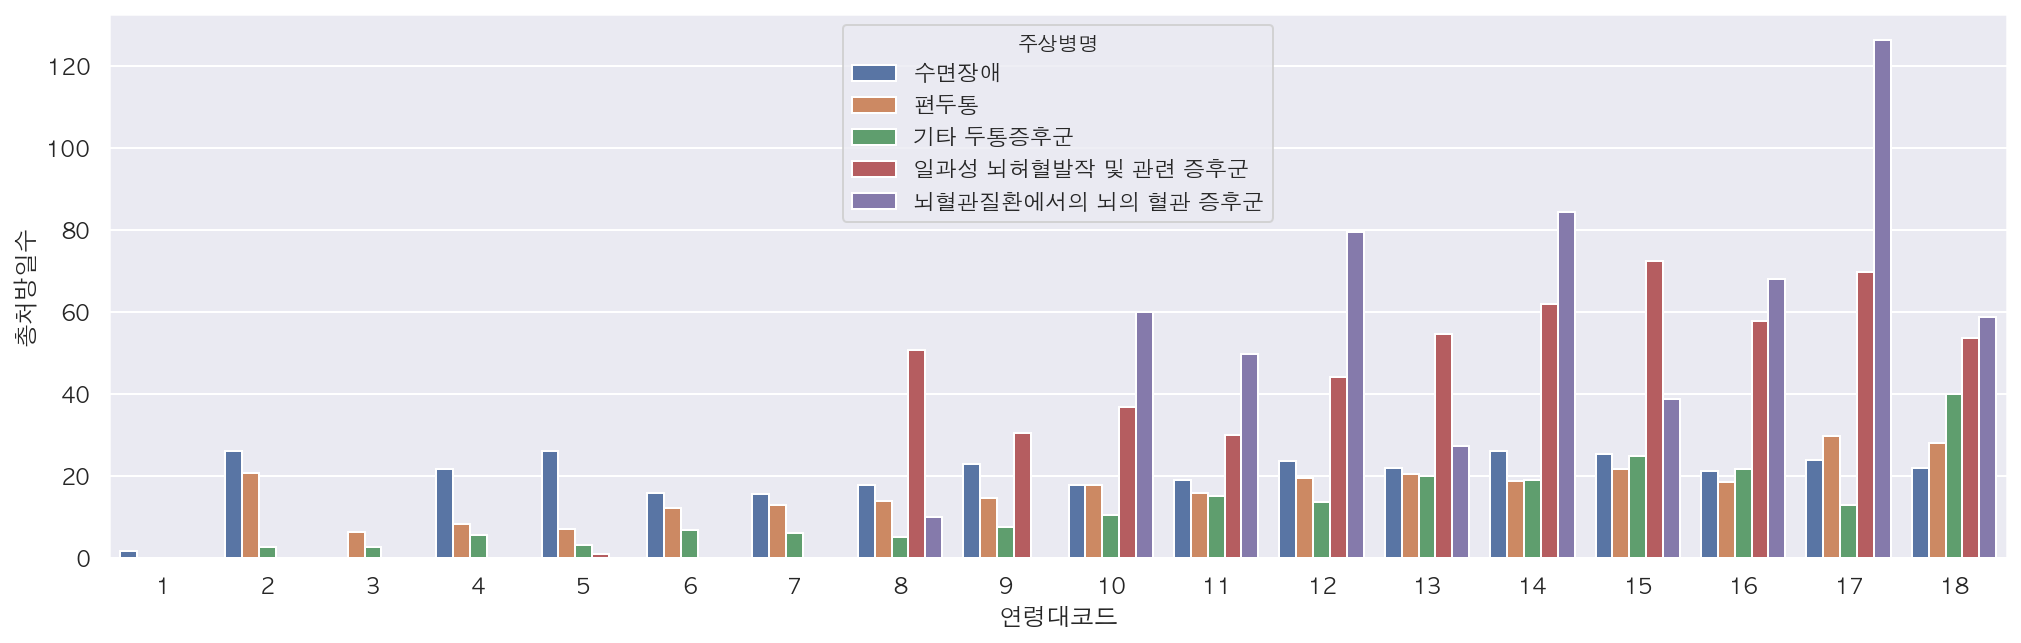

In [37]:
plt.figure(figsize=(17,5))
sns.barplot(data=df_G, x='연령대코드', y='총처방일수', hue='주상병명', ci=None)

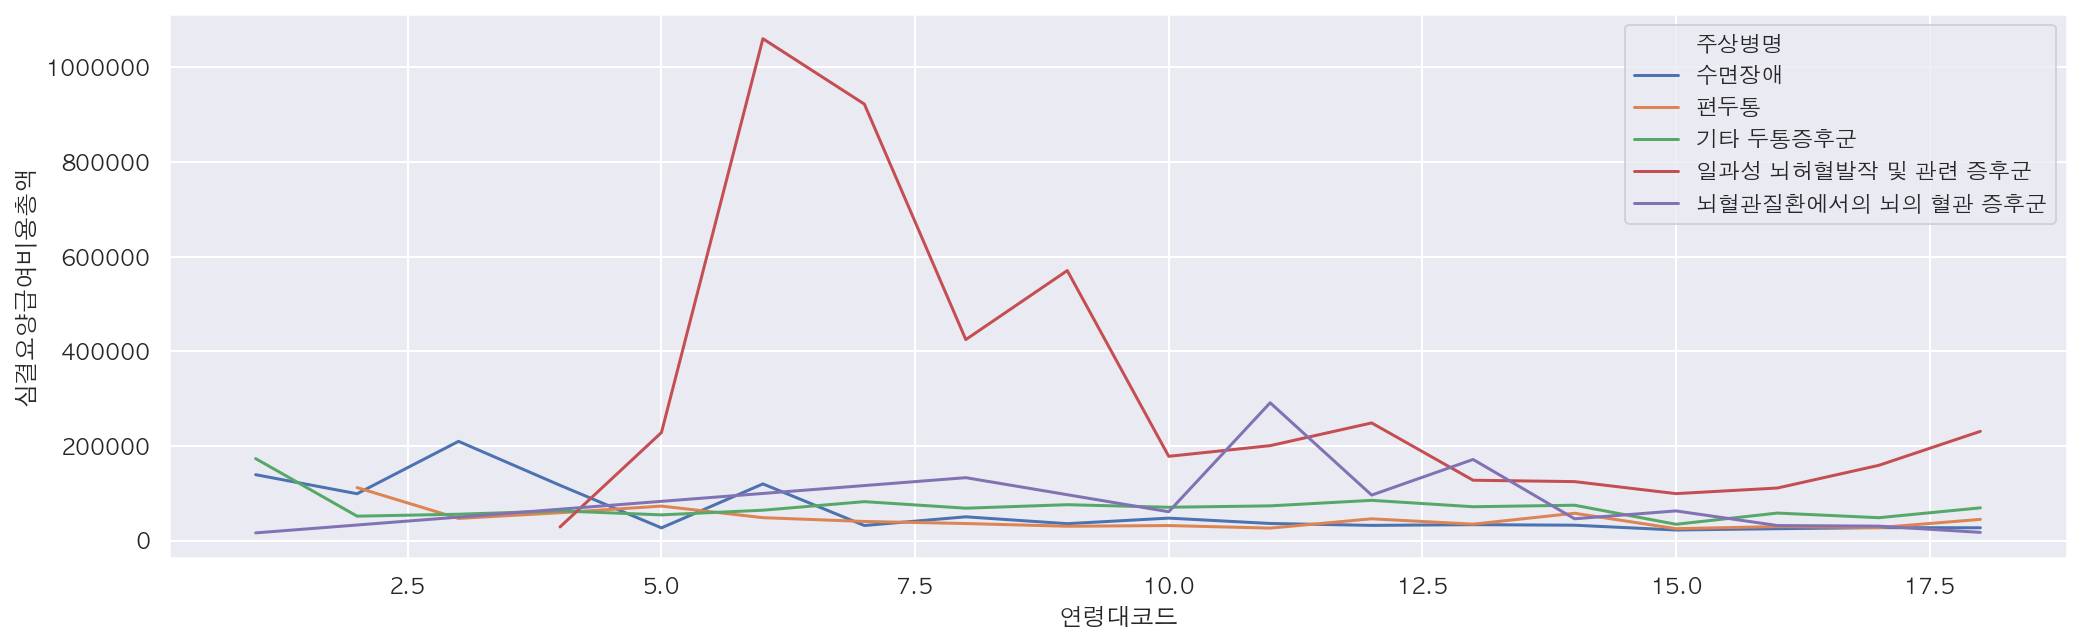

In [45]:
plt.figure(figsize=(17,5))
sns.lineplot(data=df_G, x='연령대코드', y='심결요양급여비용총액', hue='주상병명', ci=None)